In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('~/github/br-microalgal-p1/data/d_1.csv', sep=';')

In [18]:
df.head()

,Título,Autores,Autorias compartilhadas,Editores,Editores de livros,Título da fonte,Data de publicação,Ano da publicação,Volume,Edição,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Comparative energy life-cycle analyses of micr...,"Jorquera, Orlando; Kiperstok, Asher; Sales, Em...",NaN,NaN,NaN,BIORESOURCE TECHNOLOGY,FEB 2010,2010,101.0,4,...,32,47,55,42,50,47,51,51,48,1
1,Microalgae as feedstock for biodiesel producti...,"Francisco, Erika C.; Neves, Debora B.; Jacob-L...",NaN,NaN,NaN,JOURNAL OF CHEMICAL TECHNOLOGY AND BIOTECHNOLOGY,MAR 2010,2010,85.0,3,...,23,27,24,32,40,34,24,42,33,0
2,Potential carbon dioxide fixation by industria...,"Sydney, Eduardo Bittencourt; Sturm, Wilerson; ...",NaN,NaN,NaN,BIORESOURCE TECHNOLOGY,AUG 2010,2010,101.0,15,...,14,18,33,34,36,30,18,35,25,0
3,Screening Microalgae Strains for Biodiesel Pro...,"Nascimento, Iracema Andrade; Izabel Marques, S...",NaN,NaN,NaN,BIOENERGY RESEARCH,MAR 2013,2013,6.0,1,...,0,8,18,33,27,36,26,36,38,3
4,Isolation and selection of microalgae from coa...,"de Morais, Michele Greque; Vieira Costa, Jorge...",NaN,NaN,NaN,ENERGY CONVERSION AND MANAGEMENT,JUL 2007,2007,48.0,7,...,13,23,20,18,28,26,17,17,19,1


In [20]:
plt.close("all")

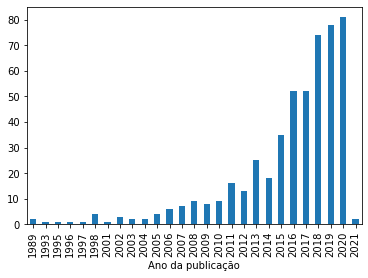

In [24]:
df.groupby('Ano da publicação')['Título'].nunique().plot(kind='bar')
plt.show()